<a href="https://colab.research.google.com/github/Nilesh-Thamke17/Deep-Learning-Lab/blob/main/Pr2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

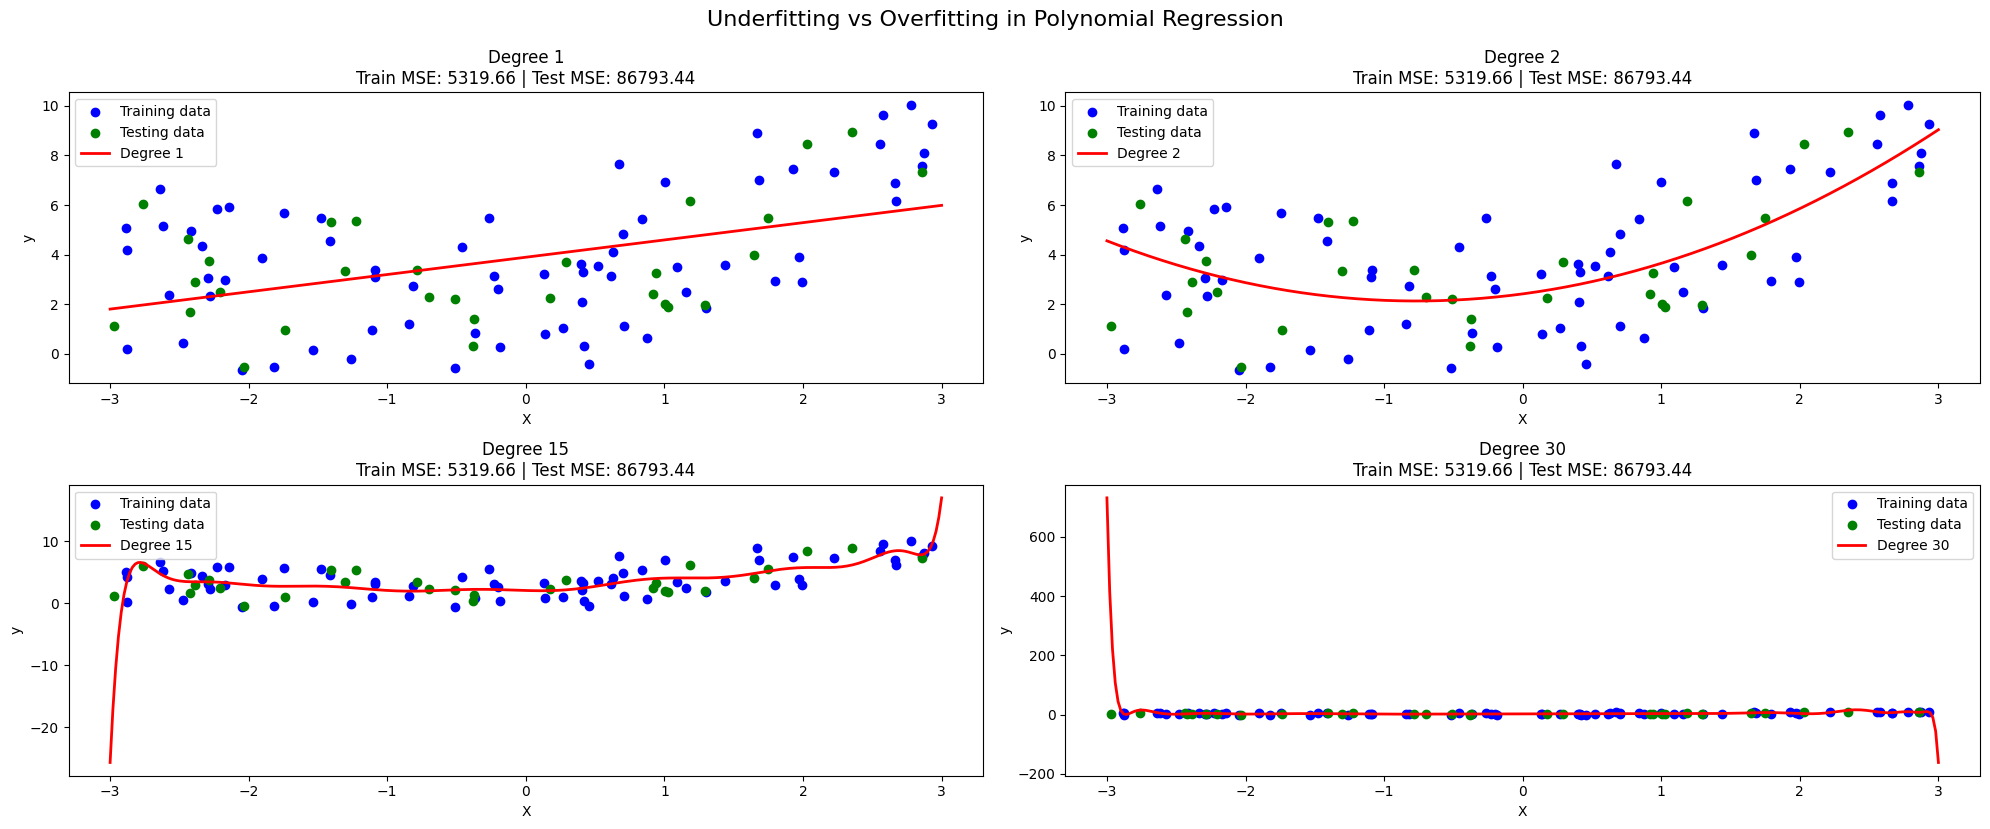

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
#  synthetic dataset
np.random.seed(0)
n_samples = 100
X = np.sort(np.random.rand(n_samples, 1) * 6 - 3, axis=0)  #[-3, 3]
y_true = 0.5 * X**2 + X + 2
noise = np.random.randn(n_samples, 1) * 2
y = y_true + noise
# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
degrees = [1, 2, 15, 30]
plt.figure(figsize=(20, 8))
for i, degree in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    # Prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    plt.subplot(2, 2, i + 1)
    plt.scatter(X_train, y_train, color='blue', label='Training data')
    plt.scatter(X_test, y_test, color='green', label='Testing data')
    X_plot = np.linspace(-3, 3, 300).reshape(-1, 1)
    y_plot = model.predict(X_plot)
    plt.plot(X_plot, y_plot, color='red', linewidth=2, label=f'Degree {degree}')
    plt.title(f'Degree {degree}\nTrain MSE: {train_mse:.2f} | Test MSE: {test_mse:.2f}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
plt.tight_layout()
plt.suptitle("Underfitting vs Overfitting in Polynomial Regression", fontsize=16, y=1.03)
plt.show()
